In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt, colors as mcolors
import os
import shutil
import numpy as np
from scipy import signal

COLORS = [color[0] for color in list(mcolors.TABLEAU_COLORS.items())]

In [2]:
def plott(dfs, columns, labels=None, x='Number of env steps total', smooth=True, kind='line', agg=None): # 'Epoch'
    assert kind in ['line', 'bar']
    if labels is not None:
        assert len(dfs) == len(labels)
        
    if type(agg) is not list:
        agg = [agg] * len(dfs)

    if len(columns) > 2:
        fig, axs = plt.subplots(2,2)
        fig.set_figheight(10)
        fig.set_figwidth(15)
    else:
        fig, axs = plt.subplots(1,2)
        fig.set_figheight(5)
        fig.set_figwidth(15)

    for i, column in enumerate(columns):    
        for j, df in enumerate(dfs):
            if column not in df.columns:
                continue
            if len(columns) > 2:
                axspos = axs[int(i/2), int(i%2)]
            else:
                axspos = axs[i]

            axspos.set_axisbelow(True)
            axspos.grid(color='gray', linestyle='dashed')
            axspos.grid(color='gray', linestyle='dashed')
            axspos.locator_params(axis='y', nbins=18)

            if kind == 'line':
                apply_smooth = smooth and len(df[x]) > 100
                if apply_smooth:
                    axspos.plot(df[x], signal.savgol_filter(df[column], 51, 11), figure=fig, color=COLORS[j % len(COLORS)], label=labels[j])
                axspos.plot(df[x], df[column], figure=fig, alpha=0.2 if apply_smooth else 1, color=COLORS[j % len(COLORS)], label=None if apply_smooth else labels[j])
            else:
                axspos.bar(j, df[x].mean() if agg[i] is None or agg[i] == 'mean' else df[x].max() / 3600, figure=fig, color=COLORS[j % len(COLORS)], label=labels[j])
            axspos.legend(loc='upper right')
            axspos.set_title(column)

In [25]:
REMOVE_BELOW_STEPS = 100000
progresses = []

for dirname, _, filenames in os.walk('output'):
    for filename in filenames:
        if 'progress' in filename:
            file = os.path.join(dirname, filename)

            try:
                tempdf = pd.read_csv(file)
            except pd.errors.EmptyDataError as e:
                shutil.rmtree(dirname, ignore_errors=True)
                print('Removed empty folder', dirname)
                continue

            steps = tempdf['Number of env steps total'].iloc[-1]
            if steps < REMOVE_BELOW_STEPS:
                #shutil.rmtree(dirname, ignore_errors=True)
                print('Removed small experiment (', steps, ' steps)', dirname)
                continue
                
            progresses.append(file)

progresses.sort()
for i, progress in enumerate(progresses):
    print(i, progress)

0 output/cheetah-vel/2020_02_16_00_49_55/progress.csv
1 output/cheetah-vel/2020_02_17_18_09_55/progress.csv
2 output/cheetah-vel/2020_03_03_16_20_26/progress.csv
3 output/cheetah-vel/2020_03_04_17_23_41/progress.csv
4 output/cheetah-vel/2020_03_05_23_41_01/progress.csv
5 output/cheetah-vel/2020_03_06_13_23_33/progress.csv
6 output/cheetah-vel/2020_03_07_17_09_05/progress.csv
7 output/cheetah-vel/2020_03_07_23_12_39/progress.csv
8 output/cheetah-vel/2020_03_17_00_33_59/progress.csv
9 output/cheetah-vel/2020_03_26_04_30_37/progress.csv
10 output/cheetah-vel/2020_03_26_04_34_42/progress.csv
11 output/cheetah-vel/2020_03_27_00_51_58/progress.csv
12 output/cheetah-vel/2020_03_29_22_24_16/progress.csv
13 output/pick-place-ml1/2020_02_15_02_00_11/progress.csv
14 output/pick-place-ml1/2020_02_15_02_02_24/progress.csv
15 output/pick-place-ml1/2020_03_04_01_00_28/progress.csv
16 output/reach-ml1/2020_04_09_01_49_41/progress.csv


In [26]:
results = [
    #('Int. Obs', pd.read_csv(progresses[0], skiprows=[1])),
    #('Int. Ctx', pd.read_csv(progresses[1], skiprows=[1])),
    #('PEARL', pd.read_csv(progresses[2], skiprows=[1], nrows=100)),
    #('PEARL', pd.read_csv(progresses[3], skiprows=[1])),
    #('Int. Ctx', pd.read_csv(progresses[4], skiprows=[1])),
    #('Ctx Only Grads', pd.read_csv(progresses[5], skiprows=[1])),
    #('Int. Ctx 3', pd.read_csv(progresses[6], skiprows=[1])),
    #('Int. Ctx 4', pd.read_csv(progresses[7], skiprows=[1])),
    #('L2 0.1', pd.read_csv(progresses[8], skiprows=[1])),
    #('Dropout', pd.read_csv(progresses[9], skiprows=[1])),
    #('L2 0.01', pd.read_csv(progresses[10], skiprows=[1])),
    #('L2 0.01 2', pd.read_csv(progresses[11], skiprows=[1])),
    #('PEARL', pd.read_csv(progresses[12], skiprows=[1], nrows=100)),
    ('PEARL', pd.read_csv(progresses[16], skiprows=[1])),
]

for i, (label, df) in enumerate(results):
    if label == 'PEARL' and 'Mean Intrinsic Reward' in df.columns:
        label = 'Intrinsic'
        results[i] = (label, df)
    
    print('Results {} ({}): {} steps ({} epochs) in {:.2f} hours'.format(
        i, 
        label, 
        df['Number of env steps total'].iloc[-1],  
        df['Epoch'].iloc[-1],
        float(df['Total Train Time (s)'].iloc[-1] / 60 / 60)
    ))
    
for column in results[0][1].columns:
    print(column)

Results 0 (PEARL): 1980000 steps (499 epochs) in 35.33 hours
Z mean train
Z variance train
KL Divergence
KL Loss
QF Loss
VF Loss
Policy Loss
Q Predictions Mean
Q Predictions Std
Q Predictions Max
Q Predictions Min
V Predictions Mean
V Predictions Std
V Predictions Max
V Predictions Min
Log Pis Mean
Log Pis Std
Log Pis Max
Log Pis Min
Policy mu Mean
Policy mu Std
Policy mu Max
Policy mu Min
Policy log std Mean
Policy log std Std
Policy log std Max
Policy log std Min
Encoder Loss
env_infos/final/train/reachDist Mean
env_infos/final/train/reachDist Std
env_infos/final/train/reachDist Max
env_infos/final/train/reachDist Min
env_infos/initial/train/reachDist Mean
env_infos/initial/train/reachDist Std
env_infos/initial/train/reachDist Max
env_infos/initial/train/reachDist Min
env_infos/train/reachDist Mean
env_infos/train/reachDist Std
env_infos/train/reachDist Max
env_infos/train/reachDist Min
env_infos/final/train/pickRew Mean
env_infos/final/train/pickRew Std
env_infos/final/train/pickRew

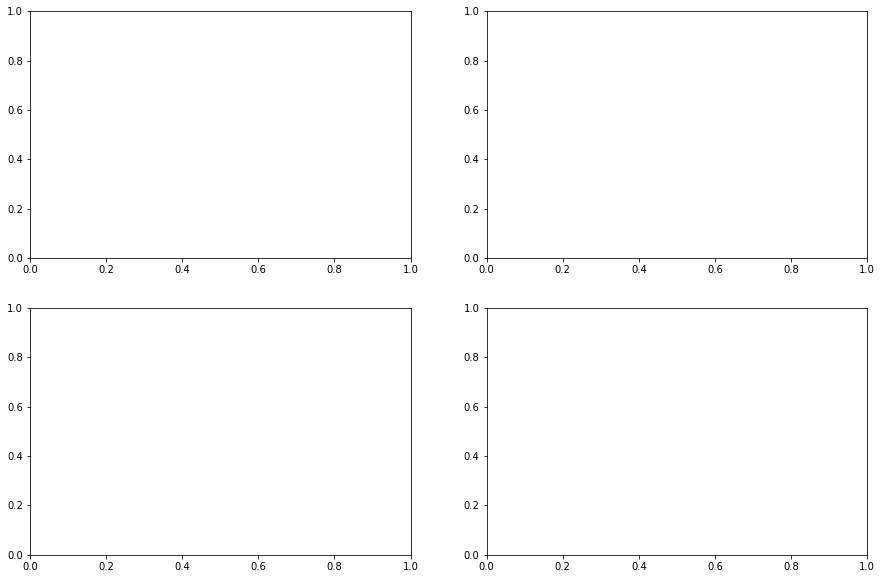

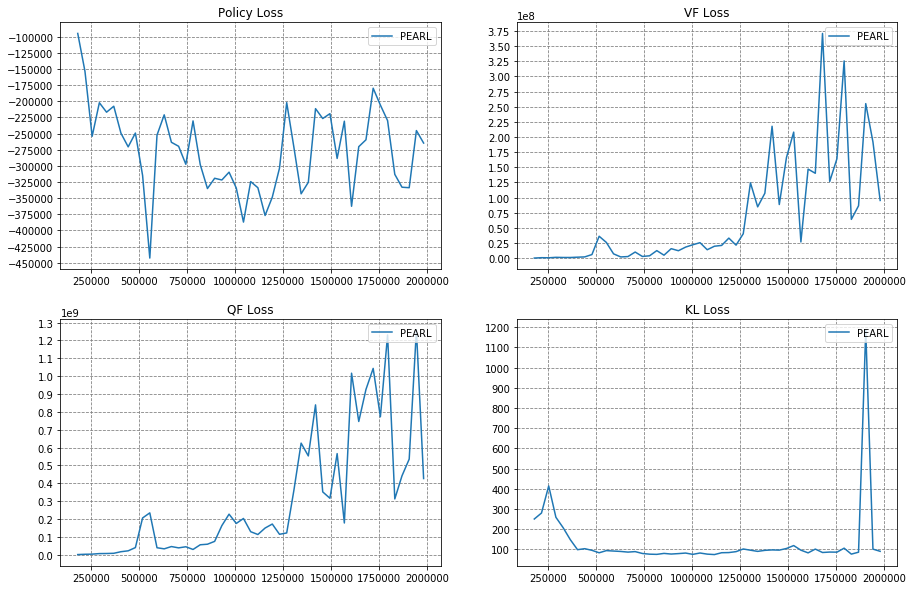

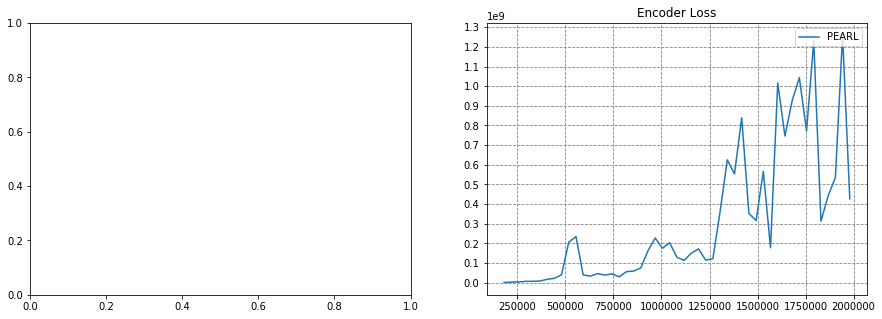

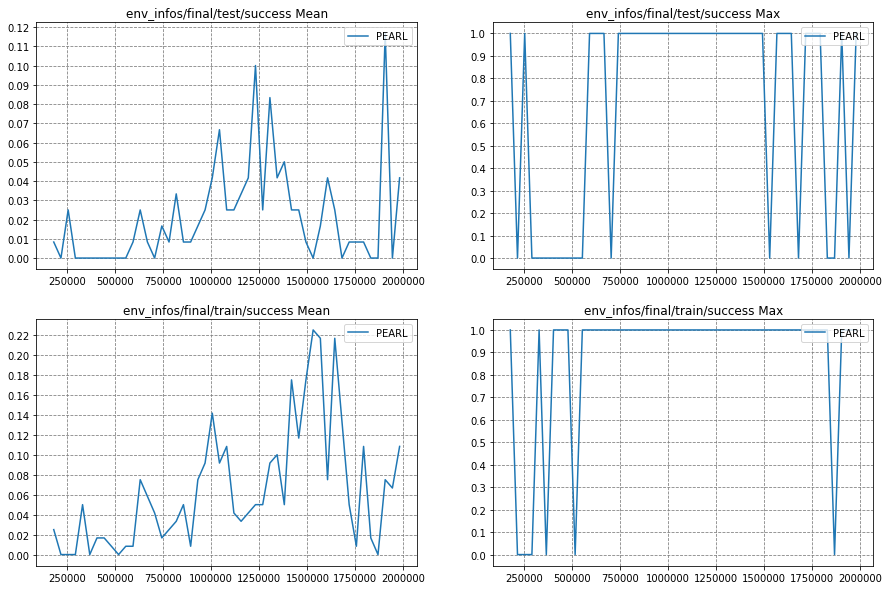

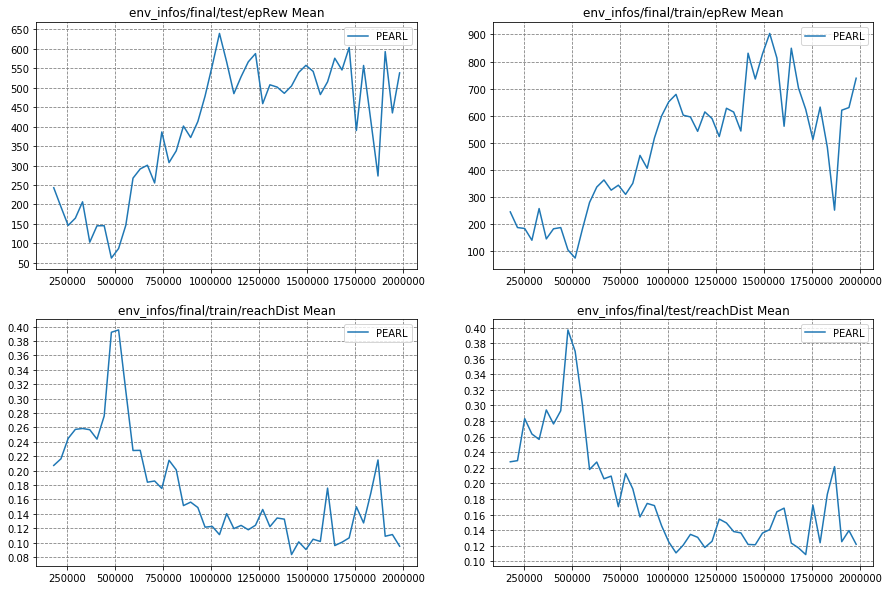

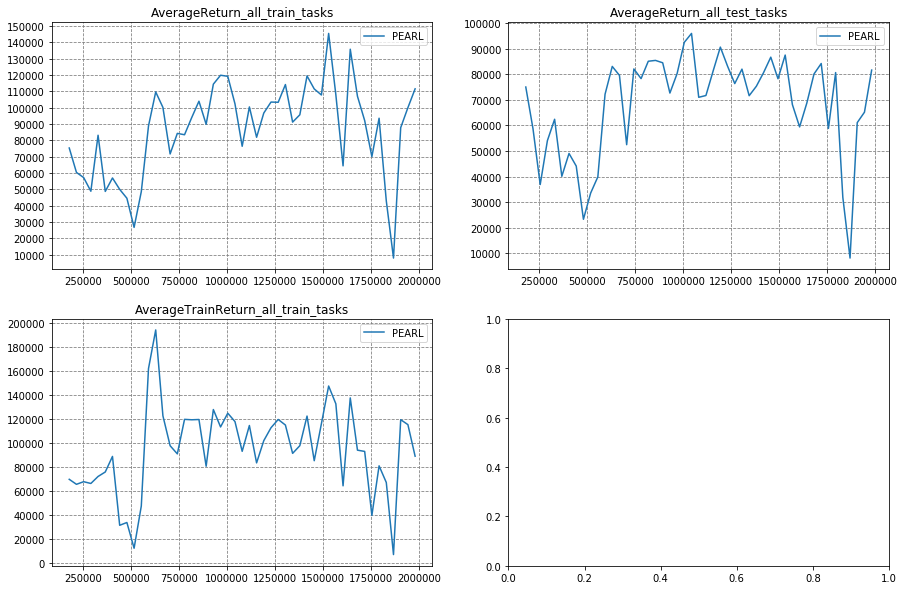

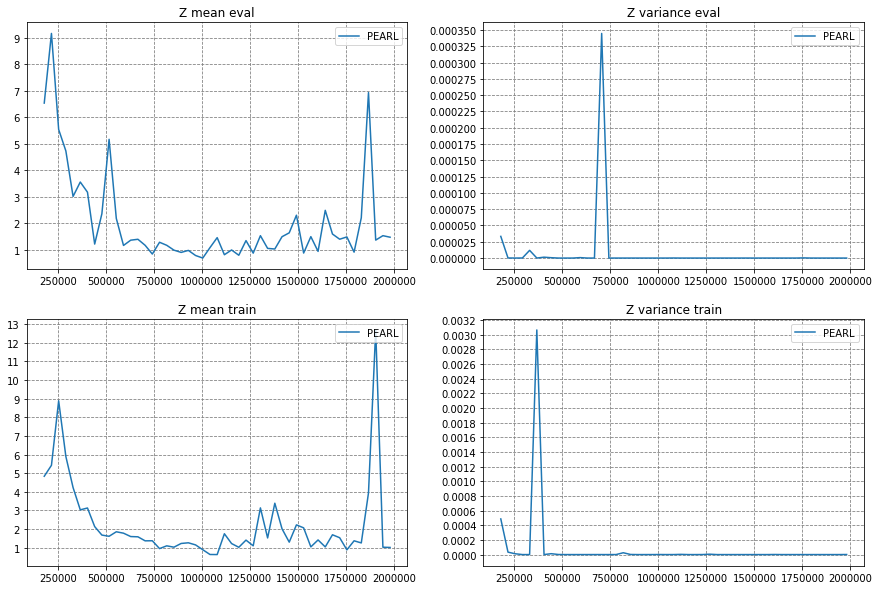

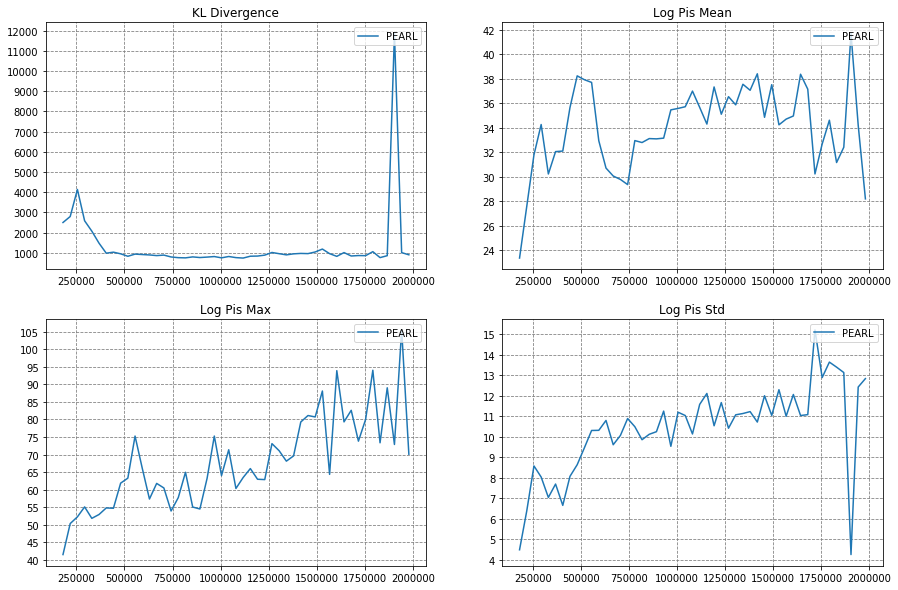

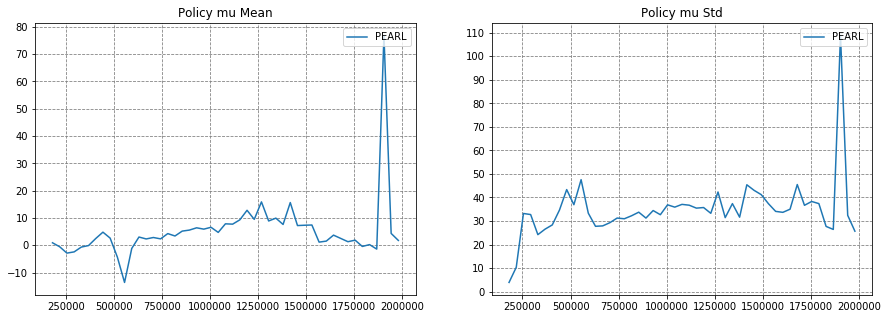

In [27]:
dfs = [df for _, df in results]
labels = [label for label, _ in results]
#plott(dfs, ['Total Train Time (s)', 'Train Time (s)', 'Sample Time (s)', 'Epoch Time (s)'], labels, kind='bar', agg=['max', 'mean', 'mean', 'mean'])
plott(dfs, ['Decoder Loss', 'Mean Intrinsic Reward', 'Mean Extrinsic Reward', 'Mean Reward'], labels)
plott(dfs, ['Policy Loss', 'VF Loss', 'QF Loss', 'KL Loss'], labels)
plott(dfs, ['L2 Loss', 'Encoder Loss'], labels)
plott(dfs, ['env_infos/final/test/success Mean', 'env_infos/final/test/success Max', 'env_infos/final/train/success Mean', 'env_infos/final/train/success Max'], labels)
plott(dfs, ['env_infos/final/test/epRew Mean', 'env_infos/final/train/epRew Mean', 'env_infos/final/train/reachDist Mean', 'env_infos/final/test/reachDist Mean'], labels) # 'env_infos/final/test/goalDist Mean', 'env_infos/final/train/goalDist Mean'
plott(dfs, ['AverageReturn_all_train_tasks', 'AverageReturn_all_test_tasks', 'AverageTrainReturn_all_train_tasks'], labels), # 'Mean Extrinsic Reward'
plott(dfs, ['Z mean eval', 'Z variance eval', 'Z mean train', 'Z variance train'], labels)
plott(dfs, ['KL Divergence', 'Log Pis Mean', 'Log Pis Max', 'Log Pis Std'], labels) # 'Latent Entropy'
plott(dfs, ['Policy mu Mean', 'Policy mu Std'], labels)